In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [40]:
class DataGenerator:
    def __init__(self, num_samples):
        self.num_samples = num_samples
    
    def generate(self):
        x = torch.unsqueeze(torch.linspace(-10, 10, self.num_samples), dim=1)
        y = 2 * x**2 + 3 * x + 1 
        #y = 3 * x + 7
        return x, yр

In [41]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, activation_func='relu', dropout_rate=0.5):
        super(MLP, self).__init__()
        
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)  # Batch Normalization для первого скрытого слоя
        self.dropout1 = nn.Dropout(dropout_rate)  # Dropout для первого скрытого слоя
        
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.bn2 = nn.BatchNorm1d(hidden_size)  # Batch Normalization для второго скрытого слоя
        self.dropout2 = nn.Dropout(dropout_rate)  # Dropout для второго скрытого слоя
        
        self.fc3 = nn.Linear(hidden_size, output_size)

        # Выбор функции активации
        if activation_func == 'relu':
            self.activation = nn.ReLU()
        elif activation_func == 'tanh':
            self.activation = nn.Tanh()
        else:
            raise ValueError("Invalid activation function. Use 'relu' or 'tanh'")
    
    def forward(self, x):
        x = self.activation(self.bn1(self.fc1(x)))  # Применяем Batch Normalization после линейного слоя
        x = self.dropout1(x)  # Применяем Dropout
        x = self.activation(self.bn2(self.fc2(x)))  # Применяем Batch Normalization
        x = self.dropout2(x)  # Применяем Dropout
        x = self.fc3(x)
        return x

In [42]:
def train_model(model, criterion, optimizer, scheduler, x_train, y_train, x_val, y_val, epochs=1000):
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        
        # Прямой проход
        outputs = model(x_train)
        loss = criterion(outputs, y_train)
        
        # Назад и оптимизация
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Обновляем learning rate через scheduler
        scheduler.step()
        
        train_losses.append(loss.item())

        # Валидация
        model.eval()
        with torch.no_grad():
            val_outputs = model(x_val)
            val_loss = criterion(val_outputs, y_val)
            val_losses.append(val_loss.item())
        
        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, LR: {scheduler.get_last_lr()[0]:.6f}')

    return train_losses, val_losses

In [43]:
# Оценка
def r2_score(y_true, y_pred):
    ss_res = torch.sum((y_true - y_pred) ** 2)
    ss_tot = torch.sum((y_true - torch.mean(y_true)) ** 2)
    r2 = 1 - ss_res / ss_tot
    return r2.item()

In [44]:
# Визуализация потерь
def plot_losses(train_losses, val_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


In [45]:
# Визуализация предсказаний
def plot_predictions(x_train, y_train, y_train_pred, x_val, y_val, y_val_pred):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(x_train.numpy(), y_train.numpy(), color='blue', label='Train Data', alpha=0.5)
    plt.scatter(x_train.numpy(), y_train_pred.numpy(), color='red', label='Predicted Train Data', alpha=0.5)
    plt.title('Training Data Predictions')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.scatter(x_val.numpy(), y_val.numpy(), color='blue', label='Validation Data', alpha=0.5)
    plt.scatter(x_val.numpy(), y_val_pred.numpy(), color='red', label='Predicted Validation Data', alpha=0.5)
    plt.title('Validation Data Predictions')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

    plt.tight_layout()
    plt.show()


Epoch [100/1000], Train Loss: 744.2266, Val Loss: 105.5944, LR: 0.005000
Epoch [200/1000], Train Loss: 454.4148, Val Loss: 109.3287, LR: 0.002500
Epoch [300/1000], Train Loss: 483.6310, Val Loss: 91.8109, LR: 0.001250
Epoch [400/1000], Train Loss: 460.1898, Val Loss: 82.0963, LR: 0.000625
Epoch [500/1000], Train Loss: 438.2668, Val Loss: 85.7814, LR: 0.000313
Epoch [600/1000], Train Loss: 436.7827, Val Loss: 88.1594, LR: 0.000156
Epoch [700/1000], Train Loss: 466.7529, Val Loss: 87.7673, LR: 0.000078
Epoch [800/1000], Train Loss: 426.0149, Val Loss: 82.5025, LR: 0.000039
Epoch [900/1000], Train Loss: 490.9924, Val Loss: 88.5565, LR: 0.000020
Epoch [1000/1000], Train Loss: 404.0833, Val Loss: 82.7493, LR: 0.000010
Train R²: 0.9797
Validation R²: 0.9791


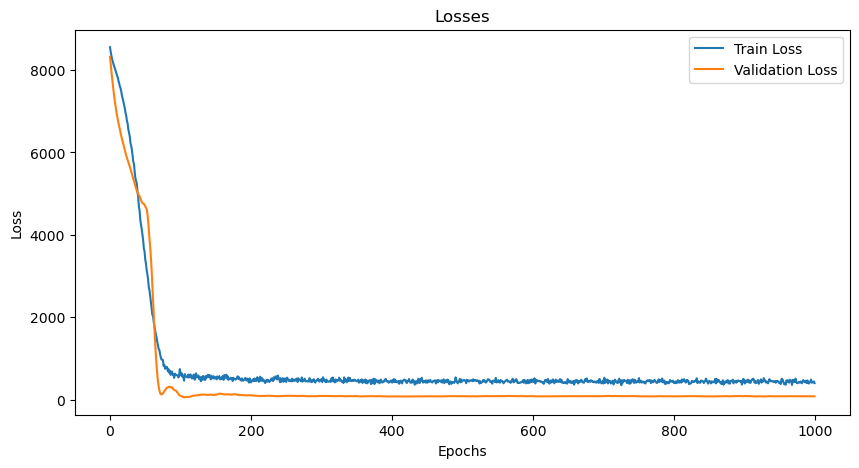

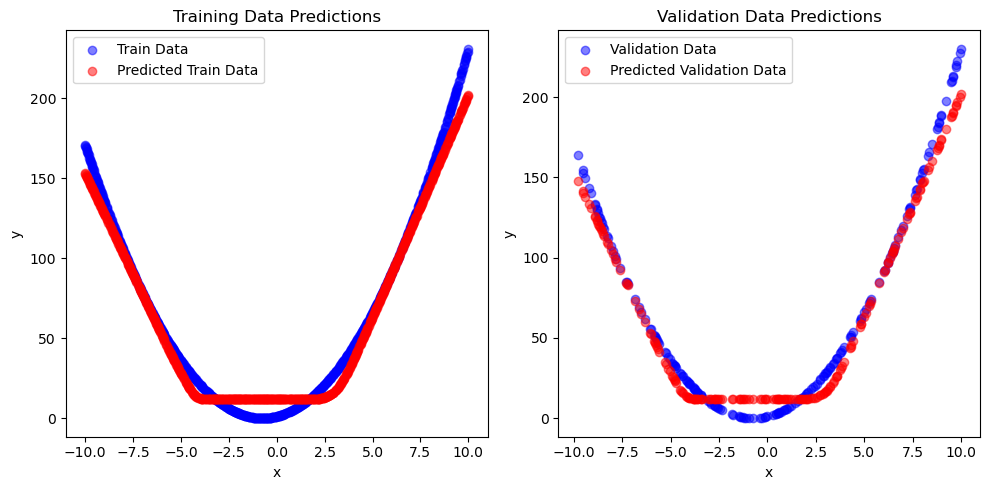

Epoch [100/1000], Train Loss: 2431.6375, Val Loss: 2235.2571, LR: 0.005000
Epoch [200/1000], Train Loss: 1722.7909, Val Loss: 1453.1600, LR: 0.002500
Epoch [300/1000], Train Loss: 1536.5820, Val Loss: 1207.1193, LR: 0.001250
Epoch [400/1000], Train Loss: 1399.7993, Val Loss: 1089.7794, LR: 0.000625
Epoch [500/1000], Train Loss: 1349.3633, Val Loss: 1028.6682, LR: 0.000313
Epoch [600/1000], Train Loss: 1281.0500, Val Loss: 996.0199, LR: 0.000156
Epoch [700/1000], Train Loss: 1335.8274, Val Loss: 977.6099, LR: 0.000078
Epoch [800/1000], Train Loss: 1238.7384, Val Loss: 971.3589, LR: 0.000039
Epoch [900/1000], Train Loss: 1260.4459, Val Loss: 965.1956, LR: 0.000020
Epoch [1000/1000], Train Loss: 1197.6561, Val Loss: 964.6846, LR: 0.000010
Train R²: 0.7630
Validation R²: 0.7567


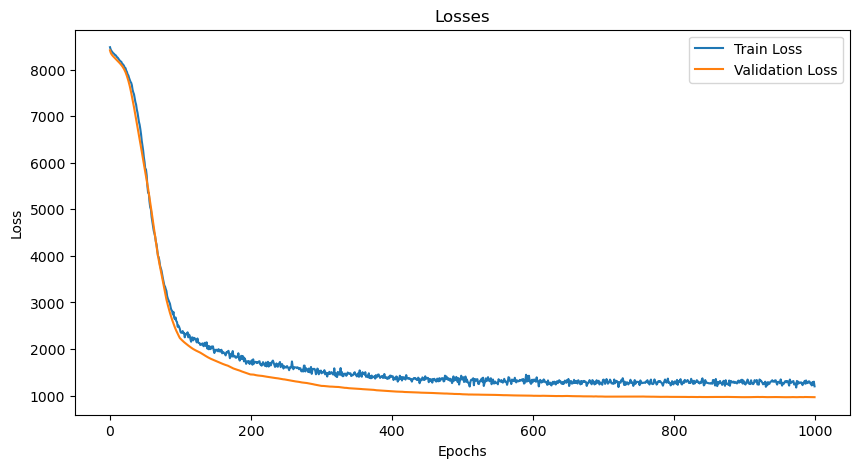

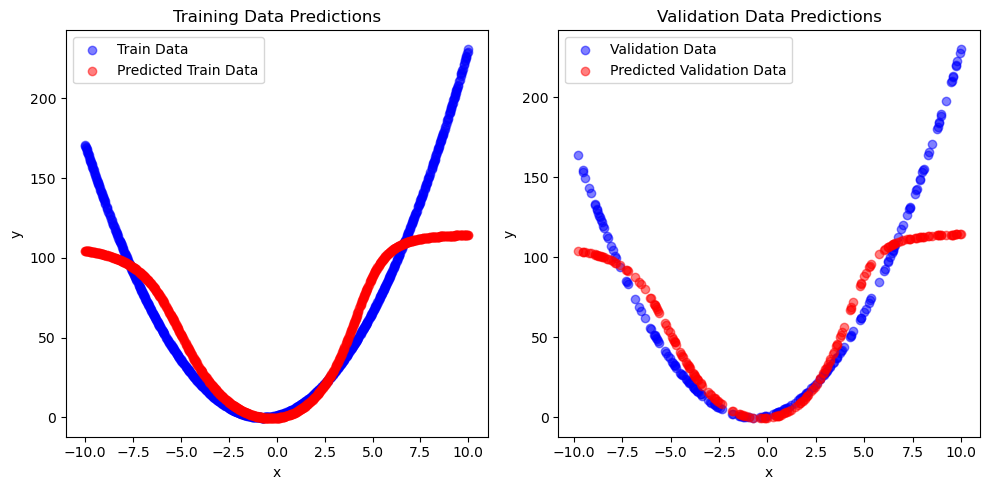

In [46]:
def main(activation_func):
    # Генерация данных
    data_gen = DataGenerator(num_samples=1000)
    x, y = data_gen.generate()

    # Преобразование тензоров в numpy массивы для использования с train_test_split
    x_np = x.numpy()
    y_np = y.numpy()

    # Разделение данных на обучающие и валидационные
    x_train, x_val, y_train, y_val = train_test_split(x_np, y_np, test_size=0.2, random_state=42)

    # Преобразование обратно в тензоры
    x_train = torch.tensor(x_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32)
    x_val = torch.tensor(x_val, dtype=torch.float32)
    y_val = torch.tensor(y_val, dtype=torch.float32)

    # Инициализация модели, критерия и оптимизатора
    input_size = 1
    hidden_size = 64
    output_size = 1
    learning_rate = 0.01
    epochs = 1000
    dropout_rate = 0.5  # Уровень Dropout

    model = MLP(input_size, hidden_size, output_size, activation_func, dropout_rate)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Использование планировщика для изменения learning rate
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.5)

    # Обучение модели
    train_losses, val_losses = train_model(model, criterion, optimizer, scheduler, x_train, y_train, x_val, y_val, epochs)

    # Получение предсказаний
    with torch.no_grad():
        y_train_pred = model(x_train)
        y_val_pred = model(x_val)

    # Оценка R²
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    print(f'Train R²: {train_r2:.4f}')
    print(f'Validation R²: {val_r2:.4f}')

    # Визуализация потерь и предсказаний
    plot_losses(train_losses, val_losses)
    plot_predictions(x_train, y_train, y_train_pred, x_val, y_val, y_val_pred)
    
    
#     # Вывод первых 20 значений y
#     print("\nПервые 20 значений y (истинные значения):")
#     print(y.numpy()[:20])
    
#     print("\nПервые 20 предсказанных значений y (Train):")
#     print(y_train_pred.numpy()[:20])
    
#     print("\nПервые 20 предсказанных значений y (Validation):")
#     print(y_val_pred.numpy()[:20])


if __name__ == '__main__':
    main('relu')  # Вызов с ReLU
    main('tanh')  # Вызов с Tanh